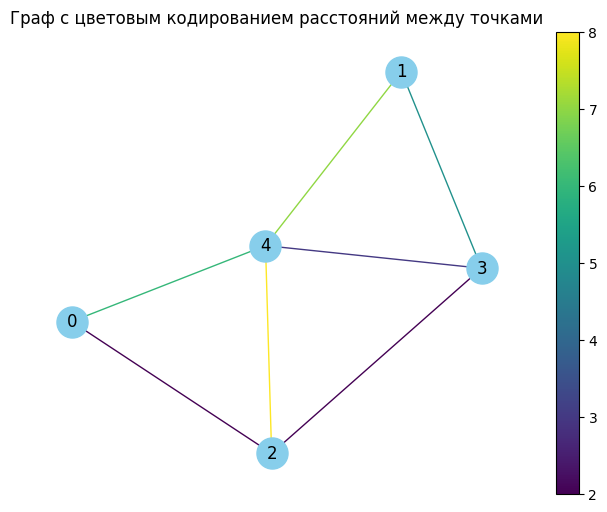

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Входная матрица смежности
adj_matrix = np.array([
    [0,0,2,0,6],
    [0,0,0,5,7],
    [2,0,0,2,8],
    [0,5,2,0,3],
    [6,7,8,3,0],
])

# Создание графа на основе матрицы смежности
G = nx.Graph()

# Добавление узлов и ребер с весами
for i in range(adj_matrix.shape[0]):
    for j in range(adj_matrix.shape[1]):
        if adj_matrix[i, j] != 0:
            G.add_edge(i, j, weight=adj_matrix[i, j])

# Получение позиций узлов для отображения
pos = nx.spring_layout(G)

# Создание подграфиков
fig, ax = plt.subplots(figsize=(8, 6))

# Отображение графа с изменением цвета ребер по расстояниям
edges = G.edges(data=True)
edge_colors = [d['weight'] for u, v, d in edges]
nx.draw(G, pos, ax=ax, with_labels=True, node_color='skyblue', node_size=500, edge_color=edge_colors, edge_cmap=plt.cm.viridis, edge_vmin=min(edge_colors), edge_vmax=max(edge_colors))

# Добавление цветовой шкалы
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(edge_colors), vmax=max(edge_colors)))
sm.set_array([])
fig.colorbar(sm, ax=ax, orientation='vertical')

# Отображение графиков
plt.title('Граф с цветовым кодированием расстояний между точками')
plt.show()